In [4]:
# Step 1.1: Load Dataset and Basic Overview

import pandas as pd

# Load the dataset
df = pd.read_csv('synthetic_food_dataset_imbalanced.csv')

# Display shape of dataset
print(f"Dataset shape: {df.shape}")

# Display the first 5 rows
df.head()


Dataset shape: (31700, 16)


,Calories,Protein,Fat,Carbs,Sugar,Fiber,Sodium,Cholesterol,Glycemic_Index,Water_Content,Serving_Size,Meal_Type,Preparation_Method,Is_Vegan,Is_Gluten_Free,Food_Name
0,290.463673,14.340084,14.152608,35.266644,4.828030,1.291432,647.553389,24.990309,81.575896,45.669118,197.570043,dinner,fried,False,False,Pizza
1,212.626748,4.080908,11.621584,23.218957,16.347814,0.130303,68.572414,34.301652,69.522492,49.854415,103.833510,snack,raw,False,True,Ice Cream
2,330.695408,14.326708,19.747680,29.479164,6.251137,0.794477,663.171859,34.816834,62.552384,40.132866,198.989367,snack,raw,False,False,Burger
3,198.070798,9.452445,5.475896,32.097878,2.984621,1.710468,300.749543,28.510998,68.688853,57.423461,135.714202,lunch,fried,False,True,Sushi
4,274.496228,6.099547,16.256002,29.756638,17.352958,1.465676,296.314958,15.403173,70.385059,33.170460,73.019474,snack,baked,False,False,Donut


In [5]:
# Step 1.2: Dataset Summary Info
print("\nData Types and Null Counts:\n")
print(df.info())

# Check for missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())

# Check for duplicate rows
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")



Data Types and Null Counts:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31700 entries, 0 to 31699
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Calories            31325 non-null  float64
 1   Protein             31325 non-null  float64
 2   Fat                 31325 non-null  float64
 3   Carbs               31325 non-null  float64
 4   Sugar               31325 non-null  float64
 5   Fiber               31325 non-null  float64
 6   Sodium              31325 non-null  float64
 7   Cholesterol         31325 non-null  float64
 8   Glycemic_Index      31325 non-null  float64
 9   Water_Content       31325 non-null  float64
 10  Serving_Size        31325 non-null  float64
 11  Meal_Type           31700 non-null  object 
 12  Preparation_Method  31700 non-null  object 
 13  Is_Vegan            31700 non-null  bool   
 14  Is_Gluten_Free      31700 non-null  bool   
 15  Food_Name           317

In [6]:
# Check column names to find the actual target class column
print(df.columns)


Index(['Calories', 'Protein', 'Fat', 'Carbs', 'Sugar', 'Fiber', 'Sodium',
       'Cholesterol', 'Glycemic_Index', 'Water_Content', 'Serving_Size',
       'Meal_Type', 'Preparation_Method', 'Is_Vegan', 'Is_Gluten_Free',
       'Food_Name'],
      dtype='object')



Class Distribution:

Meal_Type
snack        8001
breakfast    7970
dinner       7873
lunch        7856
Name: count, dtype: int64


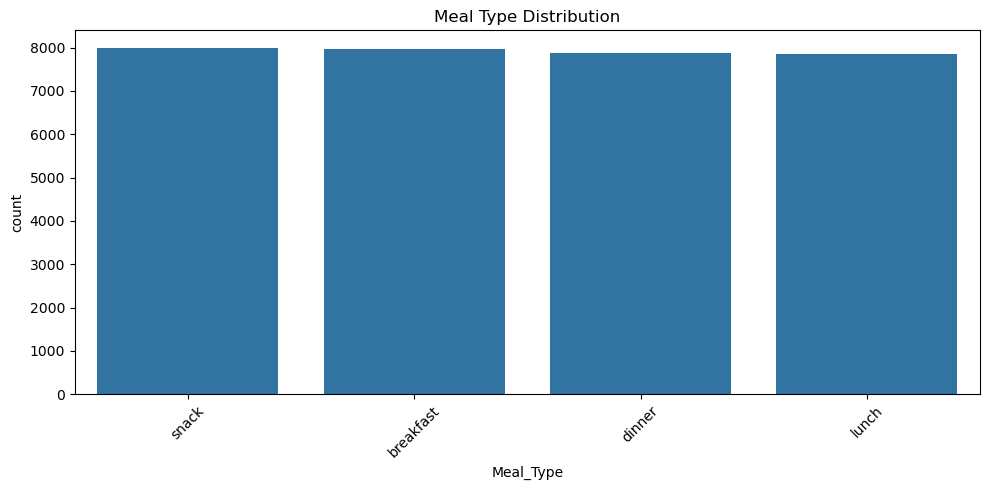

In [7]:
# Step 1.3 (Fixed): Class Distribution
print("\nClass Distribution:\n")
print(df['Meal_Type'].value_counts())

# Plotting the distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Meal_Type', order=df['Meal_Type'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Meal Type Distribution")
plt.tight_layout()
plt.show()


In [8]:
# Step 2.1: Drop rows with missing values
print(f"Before dropping NaNs: {df.shape}")
df = df.dropna()
print(f"After dropping NaNs: {df.shape}")


Before dropping NaNs: (31700, 16)
After dropping NaNs: (31325, 16)


In [9]:
# Step 2.2: Remove duplicates
print(f"Before removing duplicates: {df.shape}")
df = df.drop_duplicates()
print(f"After removing duplicates: {df.shape}")


Before removing duplicates: (31325, 16)
After removing duplicates: (31260, 16)


In [10]:
# Step 2.3: Cap outliers using IQR
import numpy as np

numeric_cols = df.select_dtypes(include=['float64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < lower_limit, lower_limit,
                       np.where(df[col] > upper_limit, upper_limit, df[col]))


In [11]:
# Step 2.4: Normalize numeric columns
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode Meal_Type (target column)
le = LabelEncoder()
df['Meal_Type_Encoded'] = le.fit_transform(df['Meal_Type'])

# Save the label mapping
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)


Label Mapping: {'breakfast': np.int64(0), 'dinner': np.int64(1), 'lunch': np.int64(2), 'snack': np.int64(3)}


In [13]:
# One-hot encode 'Preparation_Method'
df = pd.get_dummies(df, columns=['Preparation_Method'], drop_first=True)


In [14]:
# Drop columns not needed
df = df.drop(['Meal_Type', 'Food_Name'], axis=1)


In [15]:
# Feature matrix (X) and target vector (y)
X = df.drop('Meal_Type_Encoded', axis=1)
y = df['Meal_Type_Encoded']


In [16]:
from sklearn.decomposition import PCA

# Reduce to 10 principal components (optional)
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)


In [17]:
from sklearn.model_selection import train_test_split

# Split into 80% train and 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [19]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(f"\nModel: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Precision (macro):", precision_score(y_test, y_pred, average='macro'))
    print("Recall (macro):", recall_score(y_test, y_pred, average='macro'))
    print("F1 Score (macro):", f1_score(y_test, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [22]:
# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    evaluate_model(name, model, X_test, y_test)



Model: Logistic Regression
Accuracy: 0.24648112603966732
Precision (macro): 0.24499264472680837
Recall (macro): 0.2460707705086268
F1 Score (macro): 0.24087462487681122
Confusion Matrix:
 [[419 229 390 530]
 [442 222 362 528]
 [422 227 364 539]
 [409 261 372 536]]

Model: Decision Tree
Accuracy: 0.2543186180422265
Precision (macro): 0.2544693178357576
Recall (macro): 0.25429336925633866
F1 Score (macro): 0.25436049332938127
Confusion Matrix:
 [[399 380 403 386]
 [382 404 408 360]
 [380 396 377 399]
 [387 368 413 410]]

Model: Random Forest
Accuracy: 0.25415866922584773
Precision (macro): 0.254176854634117
Recall (macro): 0.2541477331470321
F1 Score (macro): 0.2540184874274975
Confusion Matrix:
 [[425 389 373 381]
 [428 405 346 375]
 [425 380 371 376]
 [413 381 396 388]]

Model: KNN
Accuracy: 0.25799744081893794
Precision (macro): 0.258061631674451
Recall (macro): 0.2580939688645678
F1 Score (macro): 0.2529712519294155
Confusion Matrix:
 [[574 435 329 230]
 [531 424 342 257]
 [531 420 

C:\Users\Admin\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [11:54:17] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Model: XGBoost
Accuracy: 0.255278310940499
Precision (macro): 0.2551954933791765
Recall (macro): 0.2552645095648691
F1 Score (macro): 0.2551368050522963
Confusion Matrix:
 [[421 398 351 398]
 [397 412 362 383]
 [409 404 369 370]
 [371 420 393 394]]

Model: Gradient Boosting
Accuracy: 0.24600127959053103
Precision (macro): 0.24513701924726444
Recall (macro): 0.24579264512082358
F1 Score (macro): 0.24493962635212901
Confusion Matrix:
 [[414 356 372 426]
 [402 322 366 464]
 [410 346 348 448]
 [391 362 371 454]]


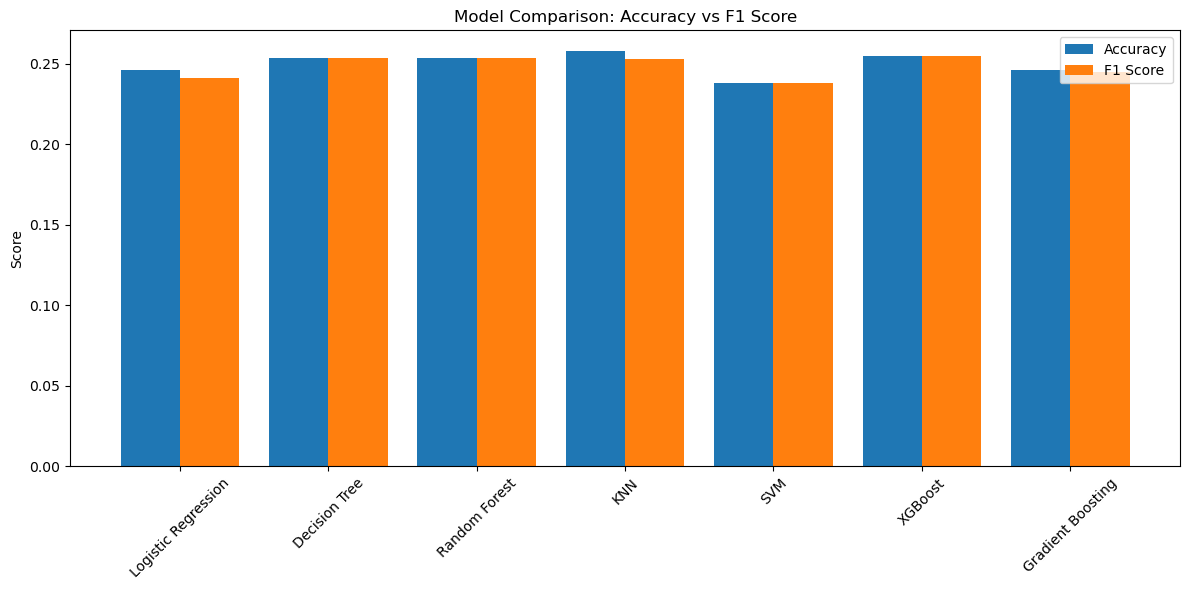

In [24]:
import matplotlib.pyplot as plt

# Manually enter the performance scores from Step 4
model_names = [
    "Logistic Regression", "Decision Tree", "Random Forest", 
    "KNN", "SVM", "XGBoost", "Gradient Boosting"
]

accuracies = [0.246, 0.254, 0.254, 0.258, 0.238, 0.255, 0.246]
f1_scores =  [0.241, 0.254, 0.254, 0.253, 0.238, 0.255, 0.245]

# Bar plot
plt.figure(figsize=(12, 6))
x = range(len(model_names))

plt.bar(x, accuracies, width=0.4, label='Accuracy', align='center')
plt.bar([i + 0.4 for i in x], f1_scores, width=0.4, label='F1 Score', align='center')

plt.xticks([i + 0.2 for i in x], model_names, rotation=45)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.legend()
plt.tight_layout()
plt.show()


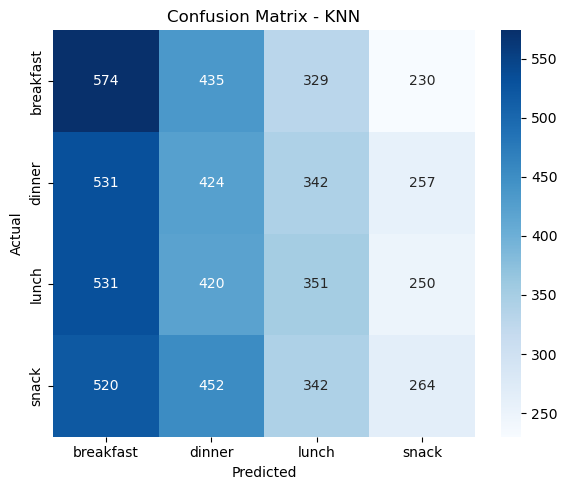

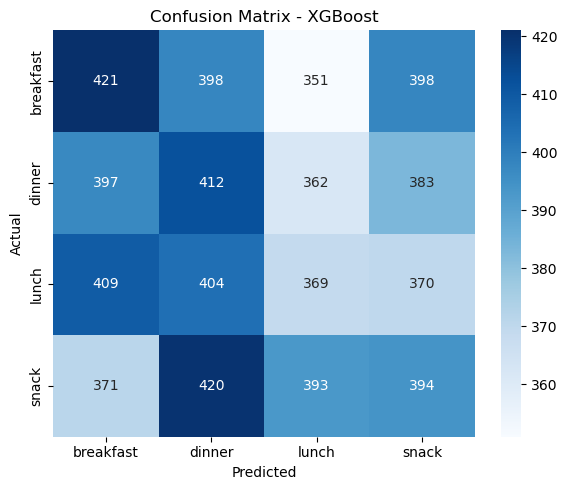

In [25]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot confusion matrix heatmap for any model
def plot_conf_matrix_heatmap(model, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=le.classes_,
                yticklabels=le.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# Plot for KNN
plot_conf_matrix_heatmap(models["KNN"], "KNN")

# Plot for XGBoost
plot_conf_matrix_heatmap(models["XGBoost"], "XGBoost")
